# Plot output from *parcels* trajectory calculation

Trajectories evaluated in parcels_seychelles_run, plot the output here specific to required analysis

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
from datetime import datetime
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [63]:
# Load the file that was output from parcels
ds=xr.open_dataset('aldabra.nc')
# Set the coordinates of the obs dimension to time (for intuitive indexing)
ds.coords['obs']=ds['time'].sel(traj=0)
# Index the first point in time
dend=ds.sel(obs=datetime(2016,1,30,0),method='nearest')

# Particle final locations

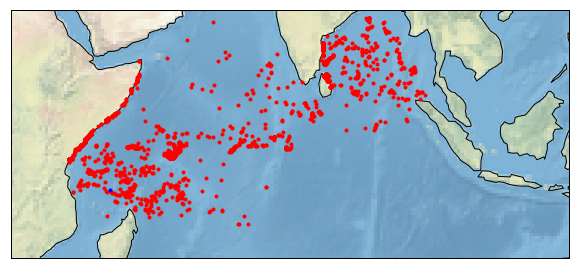

In [64]:
# Plot final points on a map projection
fig,ax = plt.subplots(figsize=(10,10),ncols=1,subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.stock_img()
ax.set_xlim(30,120)
ax.set_ylim(-20,20)
ax.plot(dend.lon.values,dend.lat.values,'r.')
ax.plot(46,-9,'b.')

# 2D histogram of final locations

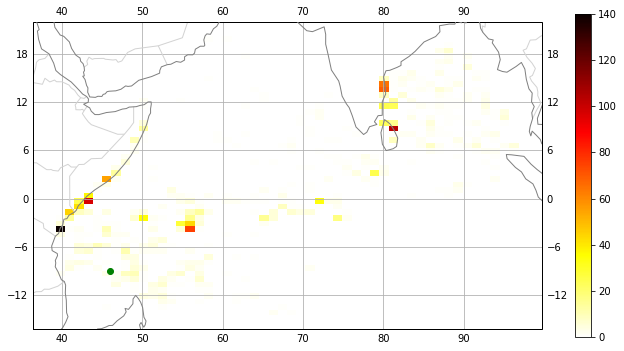

In [65]:
# Calculate 2D histogram of final locations using numpy
h,xe,ye = np.histogram2d(dend.lon.values,dend.lat.values,[50,50]);
# Set up figure
fig,ax = plt.subplots(figsize=(10,10),ncols=1,subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.BORDERS,edgecolor='lightgray',zorder=2);
ax.add_feature(cfeature.COASTLINE,edgecolor='gray',zorder=3);
ax.gridlines(draw_labels='true')
# Visualise data
im=ax.pcolormesh(xe,ye,np.transpose(h),zorder=1)
im.set_cmap('hot_r')
# Colorbar
plt.colorbar(im,ax=ax,fraction=0.029,pad=0.06);
# Plot original (final) particle location
ax.plot(46,-9,'go');


# Histogram of particle pathways

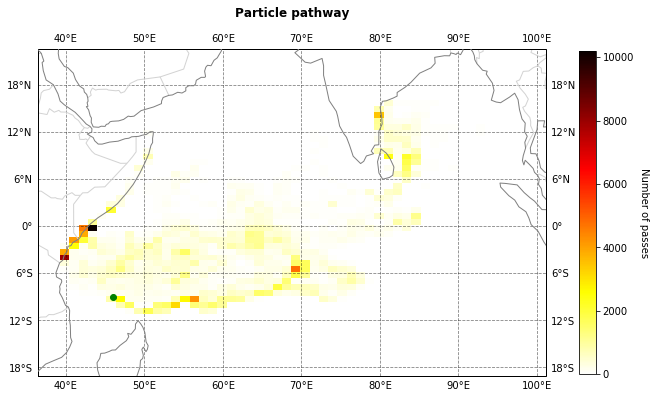

In [66]:
# Calculate 2D histogram of particle pathways using numpy
h,xe,ye = np.histogram2d(ds.lon.values.flatten(),ds.lat.values.flatten(),[50,50]);
# Set up figure
fig,ax = plt.subplots(figsize=(10,10),ncols=1,subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.BORDERS,edgecolor='lightgray',zorder=2);
ax.add_feature(cfeature.COASTLINE,edgecolor='gray',zorder=3);
gl=ax.gridlines(draw_labels='true',color='black',linestyle='--',alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.title('Particle pathway', y=1.08,fontdict={'size':12,'weight':'bold'})
# Visualise data
im=ax.pcolormesh(xe,ye,np.transpose(h),zorder=1)
im.set_cmap('hot_r')
# Colormap
cbar = plt.colorbar(im,ax=ax,fraction=0.029,pad=0.06);
cbar.set_label('Number of passes',rotation=270,labelpad=15)
# Plot original (final) particle location
ax.plot(46,-9,'go');